# Tutorial

In this tutorial we are going to use [**DuckDB**](https://duckdb.org/docs/installation/index?version=stable&environment=cli&platform=win&download_method=package_manager).

In [ ]:
!pip install duckdb duckdb-engine jupysql sqlalchemy

In [ ]:
import duckdb

# Connect to an existing DuckDB database file
con = duckdb.connect(database='hr.duckdb')

In [ ]:
%load_ext sql

%config SqlMagic.displaycon = False
%config SqlMagic.feedback = False

%sql duckdb:///hr.duckdb

In [ ]:
%%sql
-- Know tables in my database
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'main';


**Our SAMPLE Database Tables:**

- 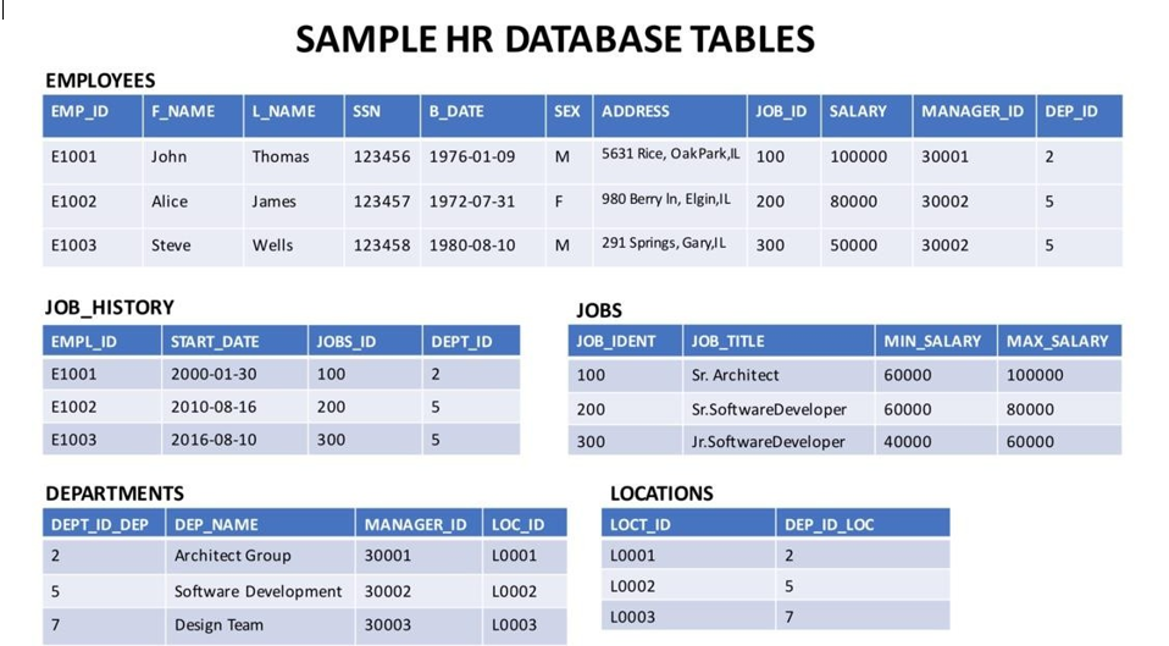

### Exploring the Database

Let us create new five tables.

In [ ]:
%%sql
DROP TABLE IF EXISTS EMPLOYEES;
DROP TABLE IF EXISTS JOB_HISTORY;
DROP TABLE IF EXISTS JOBS;
DROP TABLE IF EXISTS DEPARTMENTS;
DROP TABLE IF EXISTS LOCATIONS;

CREATE TABLE EMPLOYEES (
                            EMP_ID CHAR(9) NOT NULL, 
                            F_NAME VARCHAR(15) NOT NULL,
                            L_NAME VARCHAR(15) NOT NULL,
                            SSN CHAR(9),
                            B_DATE DATE,
                            SEX CHAR,
                            ADDRESS VARCHAR(30),
                            JOB_ID CHAR(9),
                            SALARY DECIMAL(10,2),
                            MANAGER_ID CHAR(9),
                            DEP_ID CHAR(9) NOT NULL,
                            PRIMARY KEY (EMP_ID));
                            
  CREATE TABLE JOB_HISTORY (
                            EMPL_ID CHAR(9) NOT NULL, 
                            START_DATE DATE,
                            JOBS_ID CHAR(9) NOT NULL,
                            DEPT_ID CHAR(9),
                            PRIMARY KEY (EMPL_ID,JOBS_ID));
 
 CREATE TABLE JOBS (
                            JOB_IDENT CHAR(9) NOT NULL, 
                            JOB_TITLE VARCHAR(30),
                            MIN_SALARY DECIMAL(10,2),
                            MAX_SALARY DECIMAL(10,2),
                            PRIMARY KEY (JOB_IDENT));

CREATE TABLE DEPARTMENTS (
                            DEPT_ID_DEP CHAR(9) NOT NULL, 
                            DEP_NAME VARCHAR(15) ,
                            MANAGER_ID CHAR(9),
                            LOC_ID CHAR(9),
                            PRIMARY KEY (DEPT_ID_DEP));

CREATE TABLE LOCATIONS (
                            LOCT_ID CHAR(9) NOT NULL,
                            DEP_ID_LOC CHAR(9) NOT NULL,
                            PRIMARY KEY (LOCT_ID,DEP_ID_LOC));

-- Know tables in my database
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'main';
                            

Insert values inside all tables.

In [ ]:
%%sql
INSERT INTO EMPLOYEES (EMP_ID, F_NAME, L_NAME, SSN, B_DATE, SEX, ADDRESS, JOB_ID, SALARY, MANAGER_ID, DEP_ID)
VALUES
  ('E1001', 'John', 'Thomas', '123456', '1976-09-01', 'M', '5631 Rice, OakPark,IL', '100', 100000, '30001', '2'),
  ('E1002', 'Alice', 'James', '123457', '1972-07-31', 'F', '980 Berry ln, Elgin,IL', '200', 80000, '30002', '5'),
  ('E1003', 'Steve', 'Wells', '123458', '1980-10-08', 'M', '291 Springs, Gary,IL', '300', 50000, '30002', '5'),
  ('E1004', 'Santosh', 'Kumar', '123459', '1985-07-20', 'M', '511 Aurora Av, Aurora,IL', '400', 60000, '30002', '5'),
  ('E1005', 'Ahmed', 'Hussain', '123410', '1981-04-01', 'M', '216 Oak Tree, Geneva,IL', '500', 70000, '30001', '2'),
  ('E1006', 'Nancy', 'Allen', '123411', '1978-06-02', 'F', '111 Green Pl, Elgin,IL', '600', 90000, '30001', '2'),
  ('E1007', 'Mary', 'Thomas', '123412', '1975-05-05', 'F', '100 Rose Pl, Gary,IL', '650', 65000, '30003', '7'),
  ('E1008', 'Bharath', 'Gupta', '123413', '1985-06-05', 'M', '145 Berry Ln, Naperville,IL', '660', 65000, '30003', '7'),
  ('E1009', 'Andrea', 'Jones', '123414', '1990-09-07', 'F', '120 Fall Creek, Gary,IL', '234', 70000, '30003', '7'),
  ('E1010', 'Ann', 'Jacob', '123415', '1982-03-30', 'F', '111 Britany Springs,Elgin,IL', '220', 70000, '30002', '5');

 INSERT INTO JOB_HISTORY (EMPL_ID, START_DATE, JOBS_ID, DEPT_ID)
VALUES
  ('E1001', '2000-08-01', '100', '2'),
  ('E1002', '2001-08-01', '200', '5'),
  ('E1003', '2001-08-16', '300', '5'),
  ('E1004', '2000-08-16', '400', '5'),
  ('E1005', '2000-05-30', '500', '2'),
  ('E1006', '2001-08-16', '600', '2'),
  ('E1007', '2002-05-30', '650', '7'),
  ('E1008', '2010-05-06', '660', '7'),
  ('E1009', '2016-08-16', '234', '7'),
  ('E1010', '2016-08-16', '220', '5');

 INSERT INTO JOBS (JOB_IDENT, JOB_TITLE, MIN_SALARY, MAX_SALARY)
VALUES
  ('100', 'Sr. Architect', 60000, 100000),
  ('200', 'Sr. Software Developer', 60000, 80000),
  ('300', 'Jr.Software Developer', 40000, 60000),
  ('400', 'Jr.Software Developer', 40000, 60000),
  ('500', 'Jr. Architect', 50000, 70000),
  ('600', 'Lead Architect', 70000, 100000),
  ('650', 'Jr. Designer', 60000, 70000),
  ('660', 'Jr. Designer', 60000, 70000),
  ('234', 'Sr. Designer', 70000, 90000),
  ('220', 'Sr. Designer', 70000, 90000);

 INSERT INTO DEPARTMENTS (DEPT_ID_DEP, DEP_NAME, MANAGER_ID, LOC_ID)
VALUES
  ('2', 'Architect Group', '30001', 'L0001'),
  ('5', 'Software Group', '30002', 'L0002'),
  ('7', 'Design Team', '30003', 'L0003');

 INSERT INTO LOCATIONS (LOCT_ID, DEP_ID_LOC)
VALUES
  ('L0001', '2'),
  ('L0002', '5'),
  ('L0003', '7');

In [ ]:
%%sql
SELECT * FROM employees;

In [ ]:
%%sql
SELECT * FROM jobs;

## Task 1: Create a View

In this exercise, you will create a View and show a selection of data for a given table.

1. Let's create a view called `EMPSALARY` to display salary along with some basic sensitive data of employees from the HR database. To create the `EMPSALARY` view from the `EMPLOYEES` table.
   

In [ ]:
%%sql
CREATE VIEW EMPSALARY AS
SELECT EMP_ID, F_NAME, L_NAME, B_DATE, SEX, SALARY
FROM EMPLOYEES;

2. Using SELECT, query the EMPSALARY view to retrieve all the records. Use the following statement.

In [ ]:
%sql SELECT * FROM EMPSALARY;

## Task 2: Update a View

In this exercise, you will update a View to combine two or more tables in meaningful ways.

- Assume that the `EMPSALARY` view we created in Task 1 doesn't contain enough salary information, such as max/min salary and the job title of the employees. For this, we need to get information from other tables in the database. You need all columns from `EMPLOYEES` table used above, except for `SALARY`. You also need the columns `JOB_TITLE`, `MIN_SALARY`, `MAX_SALARY` of the `JOBS` table.

In [ ]:
%%sql
CREATE OR REPLACE VIEW EMPSALARY AS
SELECT EMP_ID, F_NAME, L_NAME, B_DATE, SEX, JOB_TITLE,
MIN_SALARY, MAX_SALARY
FROM EMPLOYEES, JOBS
WHERE EMPLOYEES.JOB_ID = JOBS.JOB_IDENT;

> NOTE: The technique used here to combine data from two tables is called implicit inner

2. Using SELECT, query the updated EMPSALARY view to retrieve all the records.

In [ ]:
%%sql
SELECT * FROM EMPSALARY;

## Task 3: DROP a View

In this exercise, you will drop the created View EMPSALARY.
- Use the code below.

In [ ]:
%sql DROP VIEW EMPSALARY;

Using SELECT, you can verify whether the `EMPSALARY` view has been deleted or not.

In [ ]:
%sql SELECT * FROM EMPSALARY;

# Practice problems
Try to solve the following practice problems based on your learning in this lab.

#### 1. Create a view “EMP_DEPT” which has the following information.
`EMP_ID`, `FNAME`, `LNAME` and `DEP_ID` from `EMPLOYEES` table

In [ ]:
%%sql
-- your answer here



<details><summary>Click here for the solution</summary>

```sql
CREATE VIEW EMP_DEPT AS
SELECT EMP_ID, F_NAME, L_NAME, DEP_ID
FROM EMPLOYEES;
```
</details>

#### 2. Modify “EMP_DEPT” such that it displays Department names instead of Department IDs. For this, we need to combine information from EMPLOYEES and DEPARTMENTS as follows.
`EMP_ID`, `FNAME`, `LNAME` from `EMPLOYEES` table and
<br> `DEP_NAME` from `DEPARTMENTS` table, combined over the columns `DEP_ID` and `DEPT_ID_DEP`.</br>

In [ ]:
%%sql
-- your answer here


<details><summary>Click here for the solution</summary>

```sql
CREATE OR REPLACE VIEW EMP_DEPT AS
SELECT EMP_ID, F_NAME, L_NAME, DEP_NAME
FROM EMPLOYEES, DEPARTMENTS
WHERE EMPLOYEES.DEP_ID = DEPARTMENTS.DEPT_ID_DEP;

SELECT * FROM EMP_DEPT;
```


</details>

#### 3. Drop the view “EPM_DEPT”.

In [ ]:
%%sql
-- your answer here


<details><summary>Click here for the solution</summary>

```sql
DROP VIEW EMP_DEPT;

SELECT * FROM EMP_DEPT;
```


</details>

# Conclusion

Congratulations on completing this lab. You now have hands-on knowledge of how to use Views in SQL.

<br>You have now learned how to:<br>

- Create a new View as per the requirement

- Modify a view to include data from multiple tables in the data set

- Drop a view

# Author: 
- Eng. **Mohamed Soliman**